# NLP with Question Pairs (v1)

ML Sample of Natural Language Processing.

- For environment test and confirmation.

## Dataset

Quora Question Pairs
> Can you identify question pairs that have the same intent?

https://www.kaggle.com/competitions/quora-question-pairs/overview

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.base import BaseEstimator, clone
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score


In [2]:
# Methods preparation
def train_model(model: BaseEstimator, X_train_data: list, y_train_data: list) -> BaseEstimator:
    """Train a machine learning model
    
    Args:
        model: Machine learning model to be trained.
        X_train_data, y_train_data: Training data and labels.
        
    Returns:
        Trained model
    """
    model_copy = clone(model)
    model_copy.fit(X_train_data, y_train_data)
    return model_copy


def evaluate_trained_model(
    model: BaseEstimator,
    X_test_data: list,
    y_test_data: list
) -> None:
    """Evaluate a trained Machine Learning model using various metrics

    This function provides:
    - Accuracy Score: Measures how accurately the class labels are predicted.
    - Precision Score: Evaluates how many of the items predicted as positive are actually positive.
    - Confusion Matrix: Provides a matrix representing TP, FP, FN, TN for each class.
    - Classification Report: Generates a detailed report including Precision, Recall, F1-score, and Support for each class.

    Args:
        model: Trained machine learning model.
        X_test_data, y_test_data: Test data and labels.
    """
    y_pred = model.predict(X_test_data)

    print(f"Evaluation: {model.__class__.__name__}\n")  
    print("Accuracy:", accuracy_score(y_test_data, y_pred))
    print("Precision:", precision_score(y_test_data, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test_data, y_pred))
    print("Classification Report:\n", classification_report(y_test_data, y_pred))


In [3]:
pd.set_option("display.max_colwidth", 80)

In [4]:
# Load Train Dataset
df_train = pd.read_csv(
    './raw_data/train.csv',
    na_filter=False
)

display(df_train.head(10))

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) d...,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say...,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone and video games?,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Motorolla DCX3400?,How do I hack Motorola DCX3400 for free internet?,0


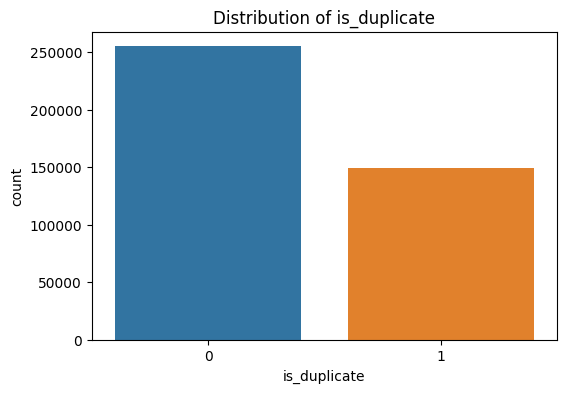

In [5]:
# Plot distribution of target
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df_train, x='is_duplicate'
)
plt.title('Distribution of is_duplicate')
plt.show()

In [6]:
# Check Dataset: mean of is_duplicate
df_train["is_duplicate"].mean()

0.369197853026293

In [7]:
# Check Dataset: interrogative questions appears more than one.
_questions = pd.Series(
    df_train["question1"].tolist() + df_train["question2"].tolist()
)

questions_counts = _questions.value_counts()

print(f"Unique question: {_questions.nunique()}")
print(f"Questions appears more than one: {(questions_counts > 1).sum()}")

Unique question: 537362
Questions appears more than one: 111873


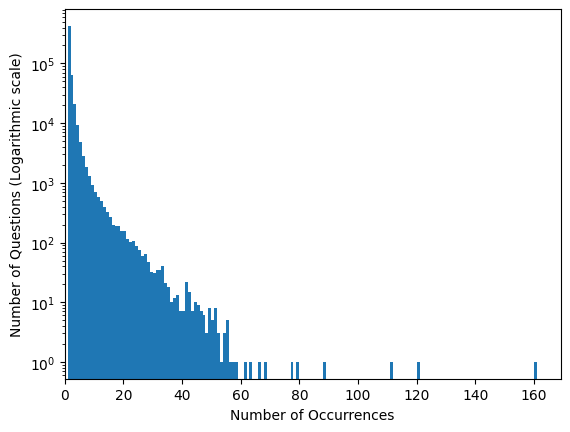

In [8]:
# Plot distribution of the number of each question occurrences
plt.hist(
    questions_counts,
    bins=range(questions_counts.max() + 1)
)
plt.xlim(xmin=0)
plt.xlabel("Number of Occurrences")
plt.ylabel("Number of Questions (Logarithmic scale)")
plt.yscale("log")
plt.show()

In [9]:
# Check Dataset: interrogative question pairs appears more than one.
df_train.duplicated(
    subset=["question1", "question2"]
).sum()

0

In [10]:
# Check Dataset: frequent question texts
questions_counts.head()

What are the best ways to lose weight?                                             161
How can you look at someone's private Instagram account without following them?    120
How can I lose weight quickly?                                                     111
What's the easiest way to make money online?                                        88
Can you see who views your Instagram?                                               79
dtype: int64

In [11]:
# Investigate missing values
print(df_train.isnull().sum())

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64


- Processing of NaN values in train dataset is NOT required.

In [12]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=2,
    max_features=1000
)

question1_tfidf = vectorizer.fit_transform(df_train['question1'])
question2_tfidf = vectorizer.transform(df_train['question2'])

In [13]:
X = question1_tfidf - question2_tfidf
y = df_train['is_duplicate']

In [14]:
# Model Building: split data
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [15]:
# Model Building: Instantiating a Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)

In [16]:
# Model Building: train model
model_lr_v1 = train_model(model_lr, X_train, y_train)

In [17]:
evaluate_trained_model(
    model_lr_v1,
    X_val,
    y_val
)

Evaluation: LogisticRegression

Accuracy: 0.6214351084617478
Precision: 0.2886519421172887
Confusion Matrix:
 [[49869   934]
 [29676   379]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.98      0.77     50803
           1       0.29      0.01      0.02     30055

    accuracy                           0.62     80858
   macro avg       0.46      0.50      0.39     80858
weighted avg       0.50      0.62      0.49     80858



In [18]:
# TF-IDF Vectorization v2
vectorizer_v2 = TfidfVectorizer(
    max_df=0.5,
    min_df=2,
    max_features=5000
)

question1_tfidf_v2 = vectorizer_v2.fit_transform(df_train['question1'])
question2_tfidf_v2 = vectorizer_v2.transform(df_train['question2'])

In [19]:
X_v2 = question1_tfidf_v2 - question2_tfidf_v2

# Model Building: split data
X_train_v2, X_val_v2, _, _ = train_test_split(
    X_v2,
    y,
    test_size=0.2,
    random_state=42
)

In [20]:
# Model Building: train model v2
model_lr_v2 = train_model(model_lr, X_train_v2, y_train)

In [21]:
evaluate_trained_model(
    model_lr_v2,
    X_val_v2,
    y_val
)

Evaluation: LogisticRegression

Accuracy: 0.6137178757822356
Precision: 0.3684445436286543
Confusion Matrix:
 [[47973  2830]
 [28404  1651]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.94      0.75     50803
           1       0.37      0.05      0.10     30055

    accuracy                           0.61     80858
   macro avg       0.50      0.50      0.43     80858
weighted avg       0.53      0.61      0.51     80858



### TF-IDF Vectorization comparison

- case max_features = 1000

  - Accuracy: 62.14%
  - Precision for class 1 (is_duplicate = 1): 28.87%
  - Recall for class 1: 1% (Most duplicates not correctly identified.)
  - F1-Score for class 1: 2%

- case max_features = 5000

  - Accuracy: 61.37%
  - Precision for class 1: 36.84%
  - Recall for class 1: 5% (Improved from forward time, but still low.)
  - F1-Score for class 1: 10%

### General Comments:

  - __Number of features:__ The model with max_features = 5000 is slightly better than the model with max_features = 1000. This may be due to the ability to catch more important words and phrases.
  - __Difficulty in detecting duplicates:__ The low recall and F1 scores for class 1 for both models indicate that this task is difficult. In particular, it seems difficult to correctly identify duplicates.
  - __Balanced data:__ The different number of samples for class 0 and class 1 may be a contributing factor to the low performance for class 1. 